<a href="https://colab.research.google.com/github/Nicolasmorahernandez/Challenger_TelecomX/blob/main/Challenger_TelecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Extracción de datos

In [250]:
import requests
import pandas as pd

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

response = requests.get(url)
data = response.json()

data_TelecomX = pd.DataFrame(data)
data_TelecomX.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [251]:
data_TelecomX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [252]:
from pandas import json_normalize

df = json_normalize(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

**Diccionario de los datos**

    **customerID**: número de identificación único de cada cliente
    **Churn**: si el cliente dejó o no la empresa
    **gender**: género (masculino y femenino)
    **SeniorCitizen**: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
    **Partner**: si el cliente tiene o no una pareja
    **Dependents**: si el cliente tiene o no dependientes
    **tenure**: meses de contrato del cliente
    **PhoneService**: suscripción al servicio telefónico
    **MultipleLines**: suscripción a más de una línea telefónica
    **InternetService**: suscripción a un proveedor de internet
    **OnlineSecurity**: suscripción adicional de seguridad en línea
    **OnlineBackup**: suscripción adicional de respaldo en línea
    **DeviceProtection**: suscripción adicional de protección del dispositivo
    **TechSupport**: suscripción adicional de soporte técnico, menor tiempo de espera
    **StreamingTV**: suscripción de televisión por cable
    **StreamingMovies**: suscripción de streaming de películas
    **Contract**: tipo de contrato
    **PaperlessBilling**: si el cliente prefiere recibir la factura en línea
    **PaymentMethod**: forma de pago
    **Charges.Monthly**: total de todos los servicios del cliente por mes
    **Charges.Total**: total gastado por el cliente


In [253]:
df.head(1)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3


**Acciones más comunes**


*   Duplicados
*   Valores vacíos
*   Tipos de datos
*   Valores atípicos
*   Consistencia y valídez de datos categoricos
*   Normalización de datos



In [254]:
#Verificar si hay valores únicos en cada columna
for col in df.columns:
    print(f"valores únicos en la columna {col}: {df[col].nunique()}")
    if df[col].nunique() < 50: #Imprima los valores si no hay muchos
        print(df[col].unique())
        print('-'*50)#Línea divisoria

valores únicos en la columna customerID: 7267
valores únicos en la columna Churn: 3
['No' 'Yes' '']
--------------------------------------------------
valores únicos en la columna customer.gender: 2
['Female' 'Male']
--------------------------------------------------
valores únicos en la columna customer.SeniorCitizen: 2
[0 1]
--------------------------------------------------
valores únicos en la columna customer.Partner: 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna customer.Dependents: 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna customer.tenure: 73
valores únicos en la columna phone.PhoneService: 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna phone.MultipleLines: 3
['No' 'Yes' 'No phone service']
--------------------------------------------------
valores únicos en la columna internet.InternetService: 3
['DSL' 'Fiber optic' 'No']
--------

In [255]:
#verificar si hay duplicados
duplicados = df.duplicated()
print(f"Hay {duplicados.sum()} duplicados")

# Verificando si hay valores nulos
valores_nulos = df.isnull().values.sum()
print("\nValores nulos por columna:")
print(valores_nulos[valores_nulos > 0])

Hay 0 duplicados

Valores nulos por columna:
[]


In [256]:
valores_en_blanco = df.apply(lambda x: x.astype(str).str.strip() == '').sum()
print("Valores en blanco por columna:")
print(valores_en_blanco[valores_en_blanco > 0])

Valores en blanco por columna:
Churn                    224
account.Charges.Total     11
dtype: int64


In [257]:
mask = df[df['Churn'].astype(str).str.strip() == '']

In [258]:
# Asegúrate de que Churn sea string
df['Churn'] = df['Churn'].astype(str)

# Construye la máscara con 3 condiciones:
mask = (
    (df['phone.PhoneService']        == 'No')    &
    (df['internet.InternetService']  == 'No')    &
    (df['Churn'].str.strip()         == '')
)

# Filtra las filas
df_filtrado = df[mask]

# Muestra el resultado
df_filtrado.head()


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total


In [259]:
df[df['Churn'].astype(str).str.strip() == 'No']

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
5,0013-MHZWF,No,Female,0,No,Yes,9,Yes,No,DSL,...,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.40,571.45
6,0013-SMEOE,No,Female,1,Yes,No,71,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.70,7904.25
7,0014-BMAQU,No,Male,0,Yes,No,63,Yes,Yes,Fiber optic,...,No,No,Yes,No,No,Two year,Yes,Credit card (automatic),84.65,5377.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7259,9979-RGMZT,No,Female,0,No,No,7,Yes,No,Fiber optic,...,Yes,No,No,Yes,Yes,One year,Yes,Mailed check,94.05,633.45
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [260]:
# Si tus valores vacíos son cadenas de espacios:
mask_missing = df['Churn'].astype(str).str.strip() == ''

# Quedarte solo con los registros etiquetados:
df_limpio = df[~mask_missing].copy()

# Comprobación
print(f"Antes: {len(df)} filas, Después: {len(df_limpio)} filas")


Antes: 7267 filas, Después: 7043 filas


In [261]:
a = 7262 - 7043
a

219

In [262]:
df_limpio['Churn'].astype(str).str.strip() == ''


,Churn
0,False
1,False
2,False
3,False
4,False
...,...
7262,False
7263,False
7264,False
7265,False


In [263]:
valores_en_blanco_limpio = df_limpio.apply(lambda x: x.astype(str).str.strip() == '').sum()
print("Valores en blanco por columna:")
print(valores_en_blanco_limpio[valores_en_blanco_limpio > 0])

Valores en blanco por columna:
account.Charges.Total    11
dtype: int64


In [264]:
df_limpio

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [265]:
df_limpio[df_limpio['customer.tenure'].astype(str).str.strip() == '0']

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


In [266]:
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   object 
 1

In [267]:
import numpy as np
df_limpio['account.Charges.Total'] = df_limpio['account.Charges.Monthly'].astype(np.float64)
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   object 
 1

In [268]:
df_limpio['Cuentas_Diarias'] = df_limpio['account.Charges.Monthly'] / 30
df_limpio.info()
df_limpio.head()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   object 
 1

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,65.6,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,59.9,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,73.9,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,98.0,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,83.9,2.796667


In [269]:
df_limpio['Cuentas_Diarias'] = df_limpio['Cuentas_Diarias'].round(1)
df_limpio.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,65.6,2.2
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,59.9,2.0
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,73.9,2.5
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,98.0,3.3
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,83.9,2.8


In [270]:
df_estandarizado = df_limpio

In [271]:
df_estandarizado

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,65.60,2.2
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,59.90,2.0
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,73.90,2.5
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,98.00,3.3
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,83.90,2.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,55.15,1.8
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,85.10,2.8
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,50.30,1.7
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,67.85,2.3


In [272]:
df_estandarizado['phone.MultipleLines'] = df_estandarizado['phone.MultipleLines'].apply(lambda x: x.replace('No phone service', 'No')).astype(str)
df_estandarizado['internet.OnlineSecurity'] = df_estandarizado['internet.OnlineSecurity'].apply(lambda x: x.replace('No internet service', 'No')).astype(str)
df_estandarizado['internet.OnlineBackup'] = df_estandarizado['internet.OnlineBackup'].apply(lambda x: x.replace('No internet service', 'No')).astype(str)
df_estandarizado['internet.DeviceProtection'] = df_estandarizado['internet.DeviceProtection'].apply(lambda x: x.replace('No internet service', 'No')).astype(str)
df_estandarizado['internet.TechSupport'] = df_estandarizado['internet.TechSupport'].apply(lambda x: x.replace('No internet service', 'No')).astype(str)
df_estandarizado['internet.StreamingTV'] = df_estandarizado['internet.StreamingTV'].apply(lambda x: x.replace('No internet service', 'No')).astype(str)
df_estandarizado['internet.StreamingMovies'] = df_estandarizado['internet.StreamingMovies'].apply(lambda x: x.replace('No internet service', 'No')).astype(str)

for col in df_estandarizado.columns:
    print(f"valores únicos en la columna {col}: {df_estandarizado[col].nunique()}")
    if df_estandarizado[col].nunique() < 50: #Imprima los valores si no hay muchos
        print(df_estandarizado[col].unique())
        print('-'*50)#Línea divisoria

valores únicos en la columna customerID: 7043
valores únicos en la columna Churn: 2
['No' 'Yes']
--------------------------------------------------
valores únicos en la columna customer.gender: 2
['Female' 'Male']
--------------------------------------------------
valores únicos en la columna customer.SeniorCitizen: 2
[0 1]
--------------------------------------------------
valores únicos en la columna customer.Partner: 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna customer.Dependents: 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna customer.tenure: 73
valores únicos en la columna phone.PhoneService: 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna phone.MultipleLines: 2
['No' 'Yes']
--------------------------------------------------
valores únicos en la columna internet.InternetService: 3
['DSL' 'Fiber optic' 'No']
------------------------------

In [273]:
# convertir la columna en formato binario
# Esto dará 1 si Churn == 'Yes', y 0 en cualquier otro caso ('No' o ' ')
df_estandarizado['Churn'] = (df_estandarizado['Churn'] == 'Yes').astype(int)
df_estandarizado['customer.Partner'] = (df_estandarizado['customer.Partner'] == 'Yes').astype(int)
df_estandarizado['customer.Dependents'] = (df_estandarizado['customer.Dependents'] == 'Yes').astype(int)
df_estandarizado['phone.PhoneService'] = (df_estandarizado['phone.PhoneService'] == 'Yes').astype(int)
df_estandarizado['phone.MultipleLines'] = (df_estandarizado['phone.MultipleLines'] == 'Yes').astype(int)
df_estandarizado['internet.OnlineSecurity'] = (df_estandarizado['internet.OnlineSecurity'] == 'Yes').astype(int)
df_estandarizado['internet.OnlineBackup'] = (df_estandarizado['internet.OnlineBackup'] == 'Yes').astype(int)
df_estandarizado['internet.DeviceProtection'] = (df_estandarizado['internet.DeviceProtection'] == 'Yes').astype(int)
df_estandarizado['internet.TechSupport'] = (df_estandarizado['internet.TechSupport'] == 'Yes').astype(int)
df_estandarizado['internet.StreamingTV'] = (df_estandarizado['internet.StreamingTV'] == 'Yes').astype(int)
df_estandarizado['internet.StreamingMovies'] = (df_estandarizado['internet.StreamingMovies'] == 'Yes').astype(int)
df_estandarizado['account.PaperlessBilling'] = (df_estandarizado['account.PaperlessBilling'] == 'Yes').astype(int)

for col in df_estandarizado.columns:
    print(f"valores únicos en la columna {col}: {df_estandarizado[col].nunique()}")
    if df_estandarizado[col].nunique() < 50: #Imprima los valores si no hay muchos
        print(df_estandarizado[col].unique())
        print('-'*50)#Línea divisoria

valores únicos en la columna customerID: 7043
valores únicos en la columna Churn: 2
[0 1]
--------------------------------------------------
valores únicos en la columna customer.gender: 2
['Female' 'Male']
--------------------------------------------------
valores únicos en la columna customer.SeniorCitizen: 2
[0 1]
--------------------------------------------------
valores únicos en la columna customer.Partner: 2
[1 0]
--------------------------------------------------
valores únicos en la columna customer.Dependents: 2
[1 0]
--------------------------------------------------
valores únicos en la columna customer.tenure: 73
valores únicos en la columna phone.PhoneService: 2
[1 0]
--------------------------------------------------
valores únicos en la columna phone.MultipleLines: 2
[0 1]
--------------------------------------------------
valores únicos en la columna internet.InternetService: 3
['DSL' 'Fiber optic' 'No']
--------------------------------------------------
valores únicos

In [274]:
df_estandarizado

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.60,65.60,2.2
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,59.90,2.0
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,73.90,2.5
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,98.00,3.3
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,83.90,2.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,0,1,0,0,One year,0,Mailed check,55.15,55.15,1.8
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,85.10,2.8
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,50.30,1.7
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,1,1,0,1,Two year,0,Mailed check,67.85,67.85,2.3


In [275]:
df_estandarizado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   int64  
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   int64  
 5   customer.Dependents        7043 non-null   int64  
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   int64  
 8   phone.MultipleLines        7043 non-null   int64  
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   int64  
 11  internet.OnlineBackup      7043 non-null   int64  
 12  internet.DeviceProtection  7043 non-null   int64  
 13  internet.TechSupport       7043 non-null   int64  
 1

## Datos de Estadistica descriptivas

Se hallarón la estadistica descriptivas de los datos que creiamos convenientes

In [276]:
cols = ['customer.tenure','account.Charges.Total', 'account.Charges.Monthly', 'Cuentas_Diarias']
tabla_descriptiva = df_estandarizado[cols].describe().T.round(1)
tabla_descriptiva

,count,mean,std,min,25%,50%,75%,max
customer.tenure,7043.0,32.4,24.6,0.0,9.0,29.0,55.0,72.0
account.Charges.Total,7043.0,64.8,30.1,18.2,35.5,70.4,89.8,118.8
account.Charges.Monthly,7043.0,64.8,30.1,18.2,35.5,70.4,89.8,118.8
Cuentas_Diarias,7043.0,2.2,1.0,0.6,1.2,2.3,3.0,4.0


## Gráficas

In [277]:
df

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


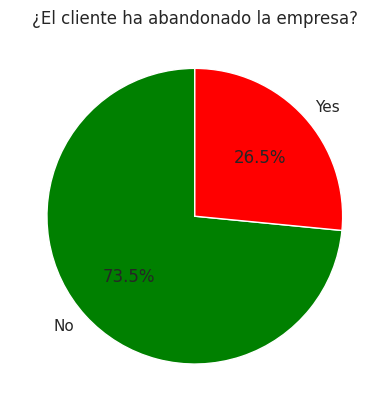

In [278]:
import matplotlib.pyplot as plt

# 1) Cuenta los 0 y 1, asegurándote de ordenarlos por índice (0 primero, 1 después)
counts = df_estandarizado['Churn'].value_counts().sort_index()

# 2) Define etiquetas y colores (0 → 'No' en rojo, 1 → 'Yes' en otro color)
labels = ['No', 'Yes']
colors = ['green', 'red']  # la primera será roja

# 3) Dibuja el pie
plt.figure()
plt.pie(
    counts,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',    # porcentaje con un decimal
    startangle=90         # gira para que empiece bien posicionado
)
plt.title('¿El cliente ha abandonado la empresa?')
plt.show()



In [279]:
# Filtrar sólo los clientes con churn == 1
df_churn_1 = df_estandarizado[df_estandarizado['Churn'] == 1]

# Ver las primeras filas
df_churn_1.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,73.9,2.5
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,98.0,3.3
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,83.9,2.8
18,0022-TCJCI,1,Male,1,0,0,45,1,0,DSL,...,1,0,0,1,One year,0,Credit card (automatic),62.7,62.7,2.1
19,0023-HGHWL,1,Male,1,0,0,1,0,0,DSL,...,0,0,0,0,Month-to-month,1,Electronic check,25.1,25.1,0.8


In [280]:
df_churn_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1869 entries, 2 to 7263
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 1869 non-null   object 
 1   Churn                      1869 non-null   int64  
 2   customer.gender            1869 non-null   object 
 3   customer.SeniorCitizen     1869 non-null   int64  
 4   customer.Partner           1869 non-null   int64  
 5   customer.Dependents        1869 non-null   int64  
 6   customer.tenure            1869 non-null   int64  
 7   phone.PhoneService         1869 non-null   int64  
 8   phone.MultipleLines        1869 non-null   int64  
 9   internet.InternetService   1869 non-null   object 
 10  internet.OnlineSecurity    1869 non-null   int64  
 11  internet.OnlineBackup      1869 non-null   int64  
 12  internet.DeviceProtection  1869 non-null   int64  
 13  internet.TechSupport       1869 non-null   int64  
 1

In [281]:
df_churn_1

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,73.90,2.5
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,98.00,3.3
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,83.90,2.8
18,0022-TCJCI,1,Male,1,0,0,45,1,0,DSL,...,1,0,0,1,One year,0,Credit card (automatic),62.70,62.70,2.1
19,0023-HGHWL,1,Male,1,0,0,1,0,0,DSL,...,0,0,0,0,Month-to-month,1,Electronic check,25.10,25.10,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7243,9961-JBNMK,1,Male,1,0,0,21,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Bank transfer (automatic),96.80,96.80,3.2
7246,9965-YOKZB,1,Male,1,0,0,9,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,83.85,83.85,2.8
7260,9985-MWVIX,1,Female,0,0,0,1,1,0,Fiber optic,...,0,0,0,0,Month-to-month,1,Mailed check,70.15,70.15,2.3
7261,9986-BONCE,1,Female,0,0,0,4,1,0,No,...,0,0,0,0,Month-to-month,0,Bank transfer (automatic),20.95,20.95,0.7


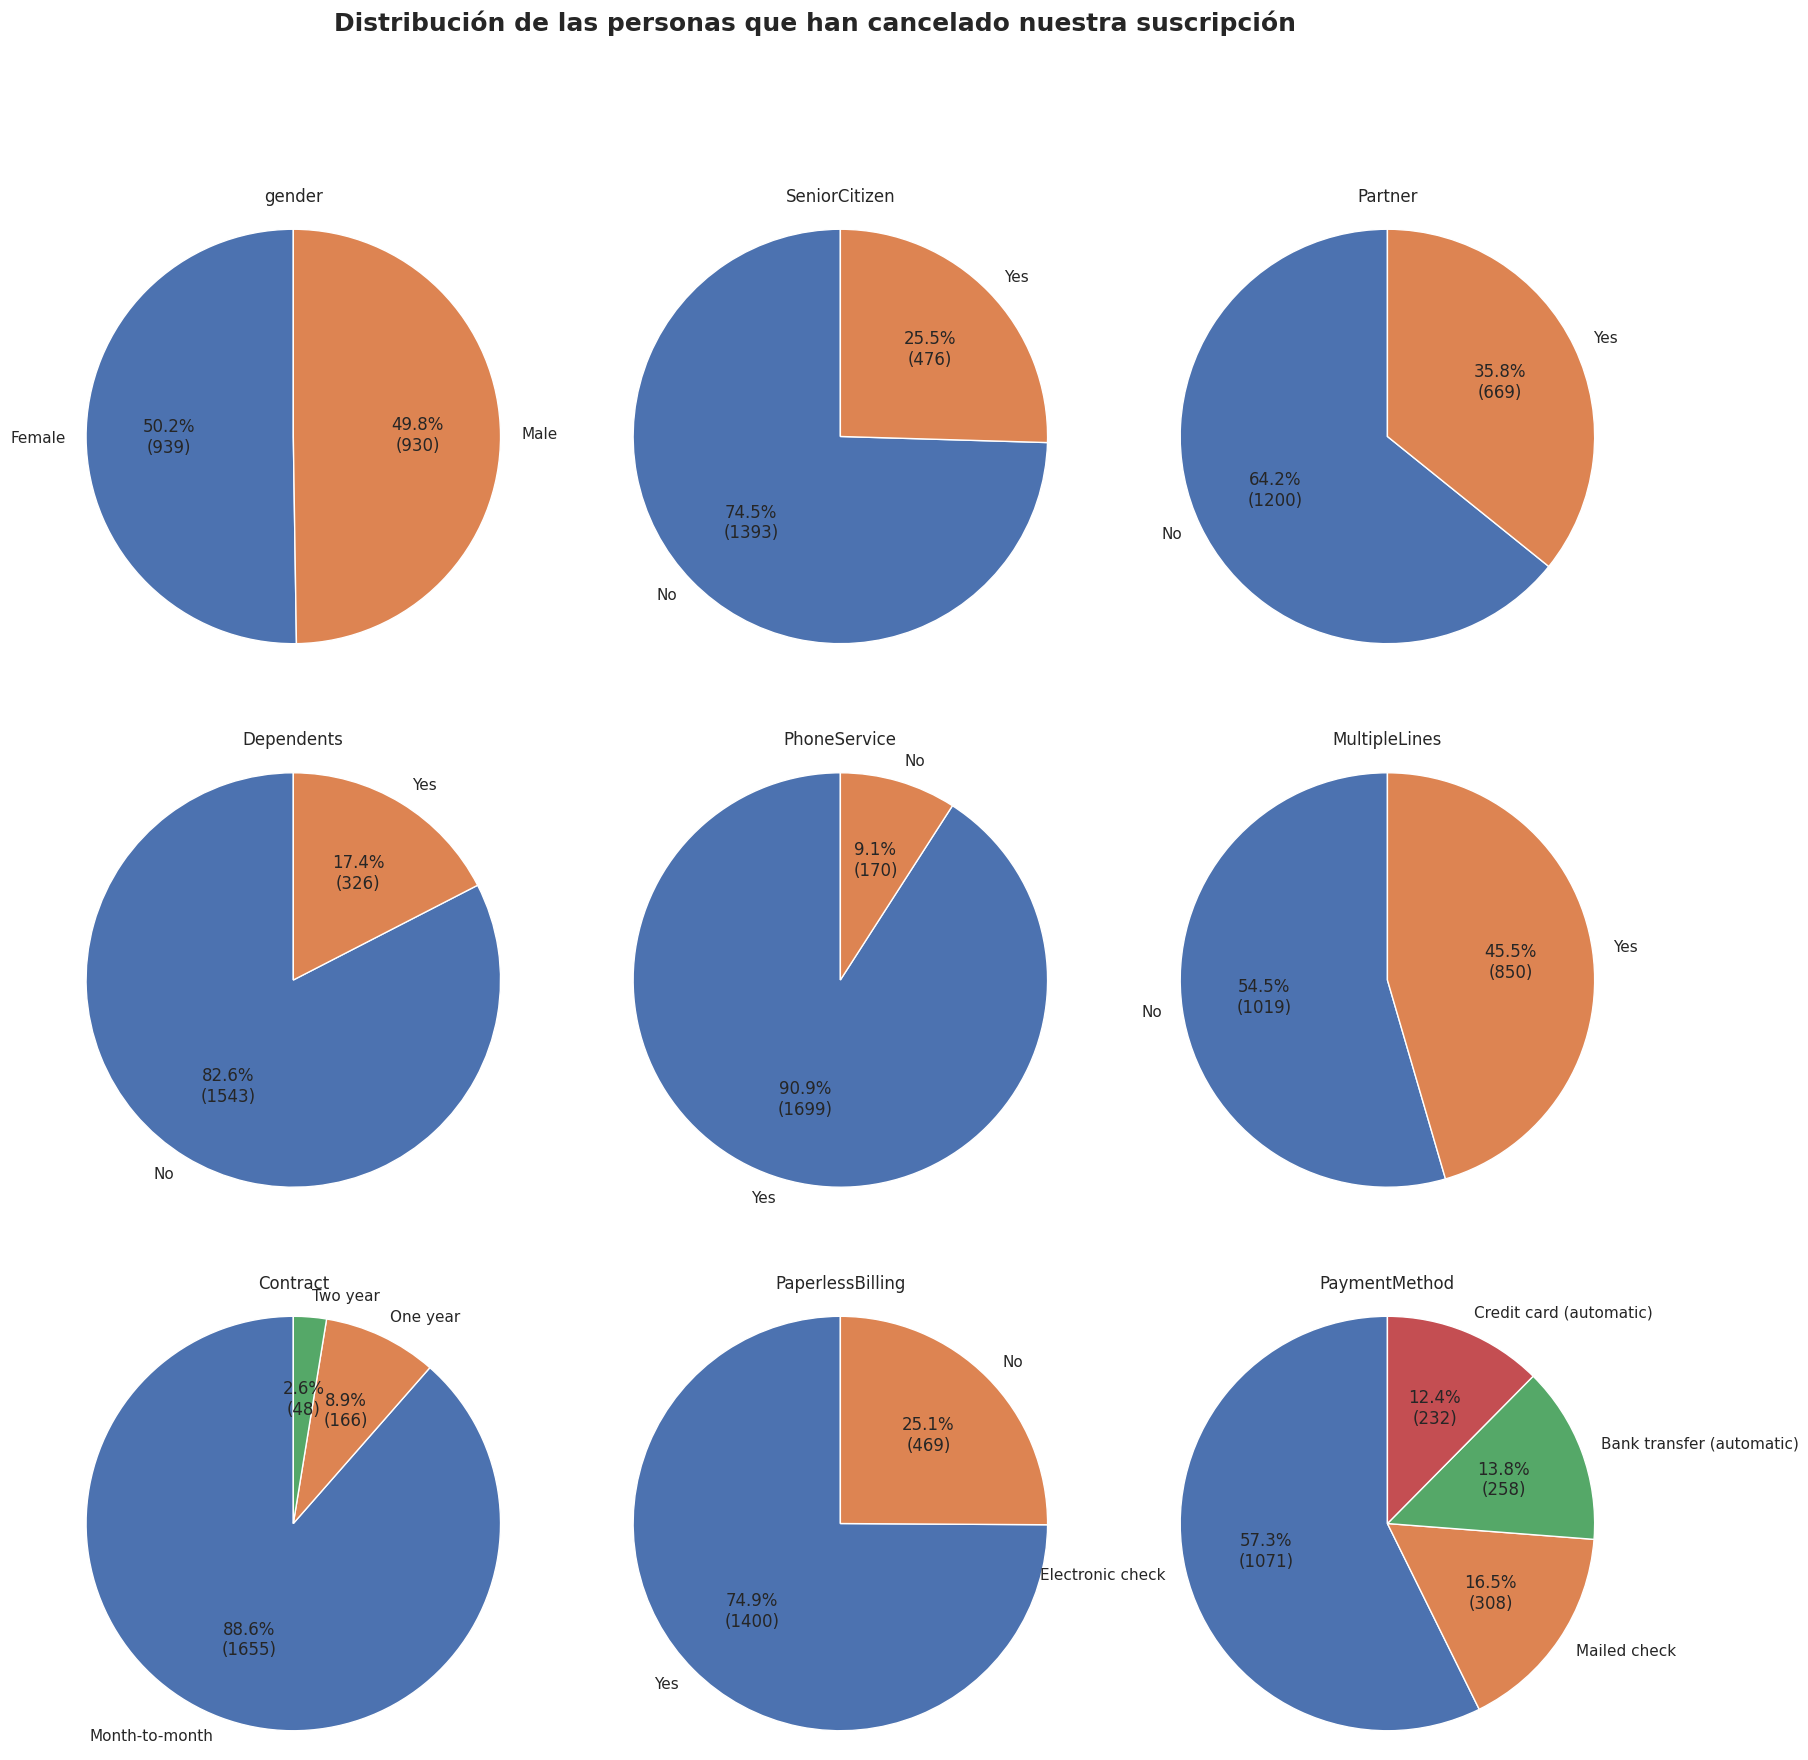

In [282]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# 1) Filtrar churn=1
df_churn1 = df_estandarizado[df_estandarizado['Churn'] == 1]

# 2) Columnas a graficar
vars_to_plot = [
    'customer.gender',
    'customer.SeniorCitizen',
    'customer.Partner',
    'customer.Dependents',
    'phone.PhoneService',
    'phone.MultipleLines',
    'account.Contract',
    'account.PaperlessBilling',
    'account.PaymentMethod'
]

# 3) Crear figura y ajustar espacios
fig, axes = plt.subplots(3, 3, figsize=(20,20),
                         gridspec_kw={'wspace':0.2, 'hspace':0.2})
axes = axes.flat

# Mapa para las etiquetas binarias
binary_map = {0: 'No', 1: 'Yes'}



for ax, col in zip(axes, vars_to_plot):
    counts = df_churn1[col].value_counts()
    raw_labels = counts.index.tolist()

    # Si todos los índices están en {0,1}, uso el map, si no, conservo raw_labels
    if set(raw_labels) <= binary_map.keys():
        labels = [binary_map[v] for v in raw_labels]
    else:
        labels = raw_labels

    ax.pie(
        counts,
        labels=labels,
        autopct=make_autopct(counts),
        startangle=90,
        radius=1.2
    )
    ax.set_title(col.split('.')[-1])
    ax.axis('equal')

    # dibujar un cuadrado alrededor
    #rect = Rectangle(
     #   (0, 0), 1, 1,
      #  transform=ax.transAxes,
       # fill=False,
        #edgecolor='black',
        #linewidth=1)

    #ax.add_patch(rect)

plt.suptitle('Distribución de las personas que han cancelado nuestra suscripción', fontsize=18, fontweight='bold')
plt.show()

In [283]:
num_cols = ['customer.tenure',
            'account.Charges.Monthly',
            'account.Charges.Total',
            'Cuentas_Diarias']

# Asegúrate de tener la columna Churn_bin = 0/1
# 2.1. Tabla resumen de count, mean, std, quartiles…
tabla_stats = (
    df_estandarizado
      .groupby('Churn')[num_cols]
      .describe()
      .round(1)
)
print(tabla_stats)


      customer.tenure                                           \
                count  mean   std  min   25%   50%   75%   max   
Churn                                                            
0              5174.0  37.6  24.1  0.0  15.0  38.0  61.0  72.0   
1              1869.0  18.0  19.5  1.0   2.0  10.0  29.0  72.0   

      account.Charges.Monthly        ... account.Charges.Total         \
                        count  mean  ...                   75%    max   
Churn                                ...                                
0                      5174.0  61.3  ...                  88.4  118.8   
1                      1869.0  74.4  ...                  94.2  118.4   

      Cuentas_Diarias                                     
                count mean  std  min  25%  50%  75%  max  
Churn                                                     
0              5174.0  2.0  1.0  0.6  0.8  2.1  2.9  4.0  
1              1869.0  2.5  0.8  0.6  1.9  2.7  3.1  3.9  

[2 rows

In [284]:
# Definir las variables numéricas de interés
num_cols = ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']

# 1) Asegurarse de tener la columna Churn_bin = 0/1
# (suponemos que df_estandarizado ya la contiene)

# 2) Agrupar por churn y calcular estadísticos descriptivos
tabla_stats = (
    df_estandarizado
      .groupby('Churn')[num_cols]
      .describe()
      .round(1)
)

# 3) Aplanar MultiIndex de columnas (describe genera un nivel extra)
tabla_stats.columns = ['_'.join(col) for col in tabla_stats.columns]

# 4) Resetear índice para convertir Churn_bin en columna estándar
tabla_stats = tabla_stats.reset_index()

# 5) Mostrar el DataFrame resultante (tabla con count, mean, std, min, 25%, 50%, 75%, max)
tabla_stats


,Churn,customer.tenure_count,customer.tenure_mean,customer.tenure_std,customer.tenure_min,customer.tenure_25%,customer.tenure_50%,customer.tenure_75%,customer.tenure_max,account.Charges.Monthly_count,...,account.Charges.Monthly_75%,account.Charges.Monthly_max,account.Charges.Total_count,account.Charges.Total_mean,account.Charges.Total_std,account.Charges.Total_min,account.Charges.Total_25%,account.Charges.Total_50%,account.Charges.Total_75%,account.Charges.Total_max
0,0,5174.0,37.6,24.1,0.0,15.0,38.0,61.0,72.0,5174.0,...,88.4,118.8,5174.0,61.3,31.1,18.2,25.1,64.4,88.4,118.8
1,1,1869.0,18.0,19.5,1.0,2.0,10.0,29.0,72.0,1869.0,...,94.2,118.4,1869.0,74.4,24.7,18.8,56.2,79.6,94.2,118.4


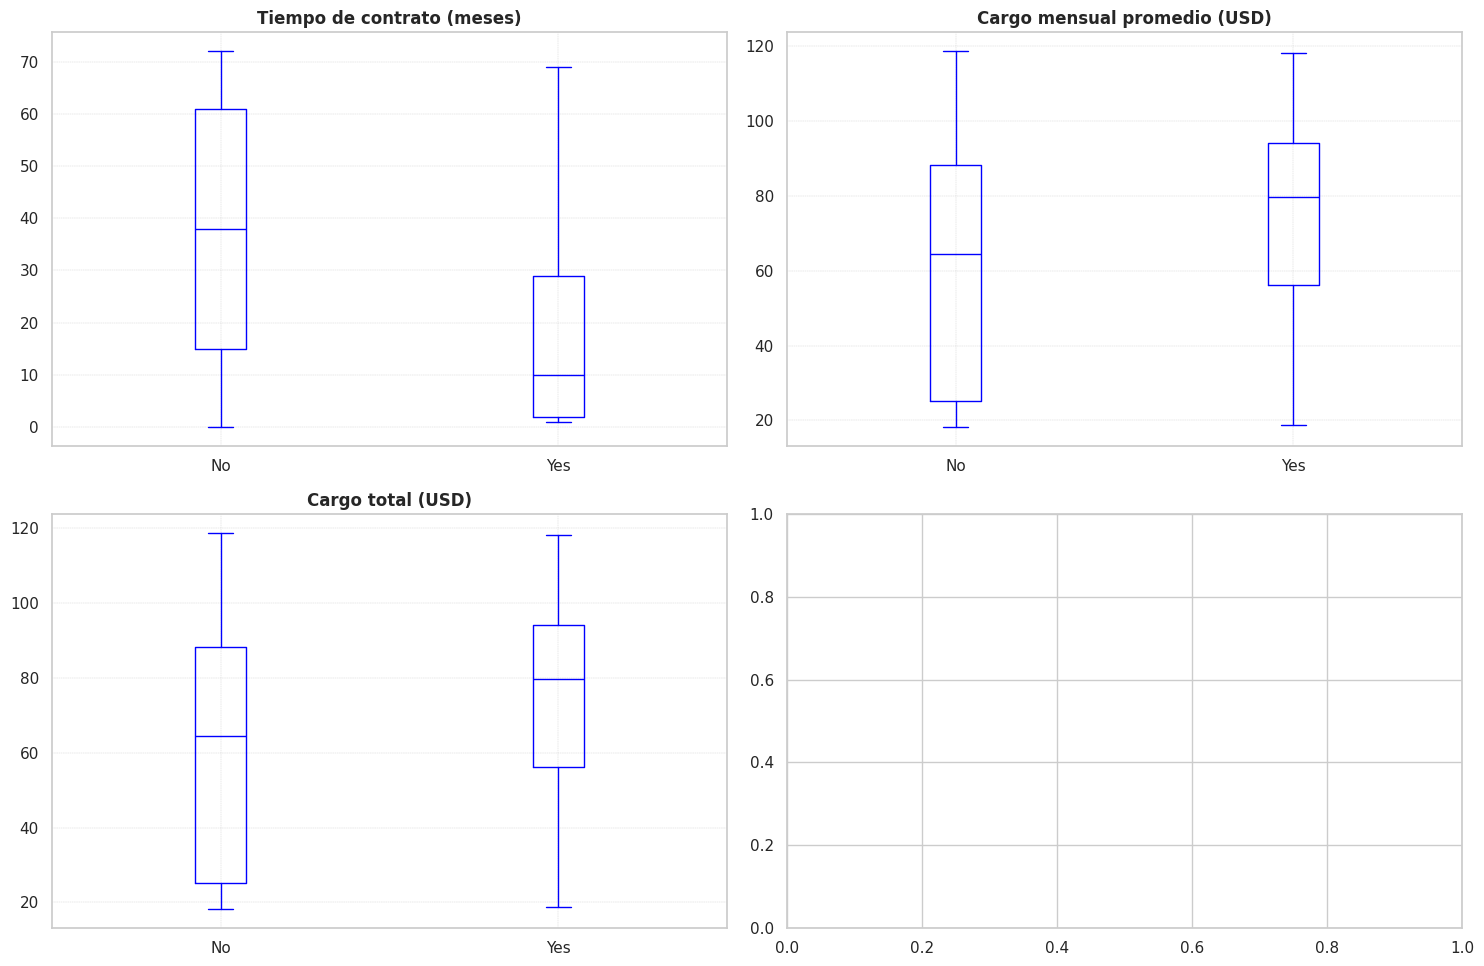

In [285]:

titles = [
    'Tiempo de contrato (meses)',
    'Cargo mensual promedio (USD)',
    'Cargo total (USD)',
    'Cargo diario (USD)'
]

fig, axes = plt.subplots(2, 2, figsize=(15,10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
axes = axes.flatten()
for ax, col, titles in zip(axes, num_cols, col1):
    df_estandarizado.boxplot(column=col, by='Churn', color='blue', ax=ax, showfliers = False)
    ax.set_title(titles, fontweight='bold')
    ax.set_xticklabels(['No','Yes'])
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.grid(True, lw=0.3, linestyle='--')

#ymin = 0
#ymax = 120

#for ax in axes:
#    ax.set_ylim(ymin, ymax)

plt.suptitle('')
plt.tight_layout()
plt.show()


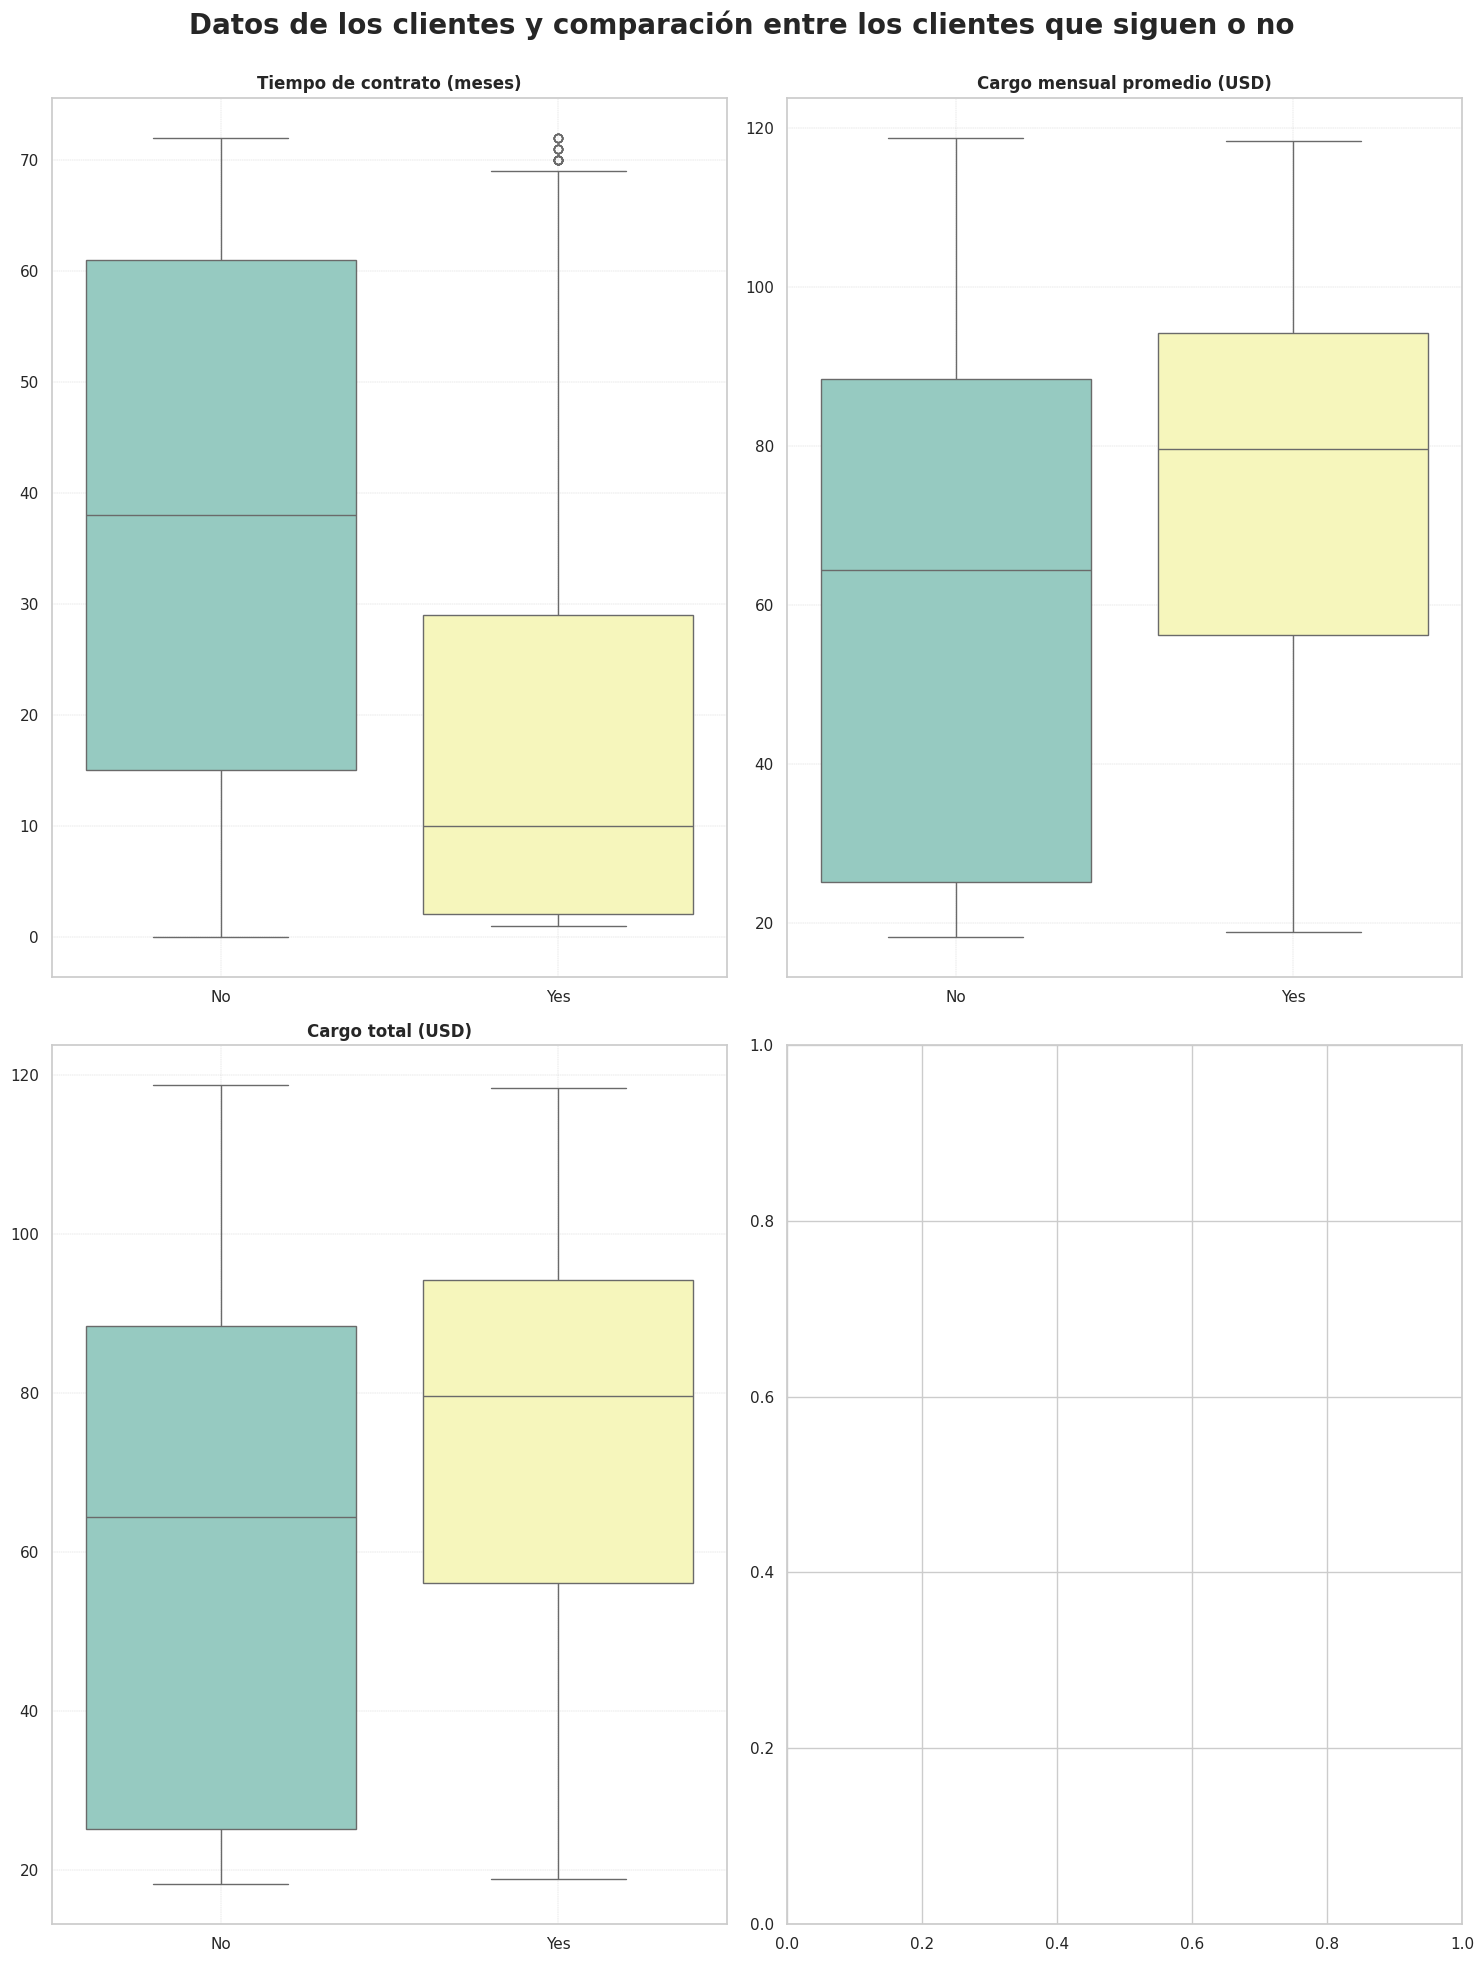

In [286]:
import seaborn as sns

sns.set_theme(style='whitegrid')

titles = [
    'Tiempo de contrato (meses)',
    'Cargo mensual promedio (USD)',
    'Cargo total (USD)',
    'Cargo diario (USD)'
]

fig, axes = plt.subplots(2, 2, figsize=(15,20))
fig.subplots_adjust(top=5, hspace=0.5, wspace=0.3)
axes = axes.flatten()
for ax, col, titles in zip(axes, num_cols, col1):
    sns.boxplot(
        data=df_estandarizado,
        x='Churn',
        y=col,
        ax=ax,
        palette='Set3',
        showfliers=True    # oculta outliers si quieres
    )
    ax.set_title(titles, fontweight='bold')
    ax.set_xticklabels(['No','Yes'])
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.grid(True, lw=0.3, linestyle='--')

#ymin = 0
#ymax = 120

#for ax in axes:
#    ax.set_ylim(ymin, ymax)

plt.suptitle('Datos de los clientes y comparación entre los clientes que siguen o no', fontsize=20, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

## Extra

In [287]:
df_limpio

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.60,65.60,2.2
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,59.90,2.0
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,73.90,2.5
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,98.00,3.3
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,83.90,2.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,0,1,0,0,One year,0,Mailed check,55.15,55.15,1.8
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,85.10,2.8
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,50.30,1.7
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,1,1,0,1,Two year,0,Mailed check,67.85,67.85,2.3


In [290]:
df_limpio1 = df_limpio.copy()

df_limpio1['internet.InternetService'] = df_limpio1['internet.InternetService'].apply(lambda x: x.replace('DSL', 'Yes').replace('Fiber optic','Yes')).astype(str)
df_limpio1['internet.InternetService'] = (df_limpio1['internet.InternetService'] == 'Yes').astype(int)
df_limpio1

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,1,...,0,1,1,0,One year,1,Mailed check,65.60,65.60,2.2
1,0003-MKNFE,0,Male,0,0,0,9,1,1,1,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,59.90,2.0
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,1,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,73.90,2.5
3,0011-IGKFF,1,Male,1,1,0,13,1,0,1,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,98.00,3.3
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,1,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,83.90,2.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,1,...,0,1,0,0,One year,0,Mailed check,55.15,55.15,1.8
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,1,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,85.10,2.8
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,1,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,50.30,1.7
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,1,...,1,1,0,1,Two year,0,Mailed check,67.85,67.85,2.3


In [291]:
df_limpio1['Cantitad_servicios_contratados'] = df_limpio1['phone.PhoneService'] + df_limpio1['phone.MultipleLines'] + df_limpio1['internet.InternetService']+ df_limpio1['internet.OnlineSecurity'] + df_limpio1['internet.OnlineBackup'] + df_limpio1['internet.DeviceProtection'] + df_limpio1['internet.TechSupport']+ df_limpio1['internet.StreamingTV'] + df_limpio1['internet.StreamingMovies']
df_limpio1

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias,Cantitad_servicios_contratados
0,0002-ORFBO,0,Female,0,1,1,9,1,0,1,...,1,1,0,One year,1,Mailed check,65.60,65.60,2.2,5
1,0003-MKNFE,0,Male,0,0,0,9,1,1,1,...,0,0,1,Month-to-month,0,Mailed check,59.90,59.90,2.0,4
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,1,...,0,0,0,Month-to-month,1,Electronic check,73.90,73.90,2.5,3
3,0011-IGKFF,1,Male,1,1,0,13,1,0,1,...,0,1,1,Month-to-month,1,Electronic check,98.00,98.00,3.3,6
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,1,...,1,1,0,Month-to-month,1,Mailed check,83.90,83.90,2.8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,1,...,1,0,0,One year,0,Mailed check,55.15,55.15,1.8,4
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,1,...,0,0,1,Month-to-month,1,Electronic check,85.10,85.10,2.8,4
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,1,...,0,0,0,Month-to-month,1,Mailed check,50.30,50.30,1.7,3
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,1,...,1,0,1,Two year,0,Mailed check,67.85,67.85,2.3,6


In [303]:
# Selecciona solo las columnas de interés
cols_corr = [
    #'Churn',
    'customer.tenure',
    'account.Charges.Monthly',
    'account.Charges.Total',
    'Cuentas_Diarias',
    'Cantitad_servicios_contratados'
]

corr = df_limpio1[cols_corr].corr().round(2)
print(corr)


                                customer.tenure  account.Charges.Monthly  \
customer.tenure                            1.00                     0.25   
account.Charges.Monthly                    0.25                     1.00   
account.Charges.Total                      0.25                     1.00   
Cuentas_Diarias                            0.25                     1.00   
Cantitad_servicios_contratados             0.47                     0.85   

                                account.Charges.Total  Cuentas_Diarias  \
customer.tenure                                  0.25             0.25   
account.Charges.Monthly                          1.00             1.00   
account.Charges.Total                            1.00             1.00   
Cuentas_Diarias                                  1.00             1.00   
Cantitad_servicios_contratados                   0.85             0.85   

                                Cantitad_servicios_contratados  
customer.tenure                  

In [312]:
# Calcula la matriz
corr = df_limpio1[cols_corr].corr().round(2)

# Usa Styler para darle color de fondo según intensidad
corr.style \
    .background_gradient(cmap='YlGn', axis=None) \
    .format('{:.2f}') \
    .set_caption('Matriz de correlación con todos los clientes y no clientes')


,customer.tenure,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias,Cantitad_servicios_contratados
customer.tenure,1.00,0.25,0.25,0.25,0.47
account.Charges.Monthly,0.25,1.00,1.00,1.00,0.85
account.Charges.Total,0.25,1.00,1.00,1.00,0.85
Cuentas_Diarias,0.25,1.00,1.00,1.00,0.85
Cantitad_servicios_contratados,0.47,0.85,0.85,0.85,1.00


In [305]:
df_churn11 = df_limpio1[df_estandarizado['Churn'] == 1]
df_churn00 = df_limpio1[df_estandarizado['Churn'] == 0]

In [313]:
corr = df_churn11[cols_corr].corr().round(2)

# Usa Styler para darle color de fondo según intensidad
corr.style \
    .background_gradient(cmap='YlGn', axis=None) \
    .format('{:.2f}') \
    .set_caption('Matriz de correlación de los clientes que dejarón la empresa')

,customer.tenure,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias,Cantitad_servicios_contratados
customer.tenure,1.00,0.40,0.40,0.40,0.59
account.Charges.Monthly,0.40,1.00,1.00,1.00,0.82
account.Charges.Total,0.40,1.00,1.00,1.00,0.82
Cuentas_Diarias,0.40,1.00,1.00,1.00,0.82
Cantitad_servicios_contratados,0.59,0.82,0.82,0.82,1.00


In [314]:
corr = df_churn00[cols_corr].corr().round(2)

# Usa Styler para darle color de fondo según intensidad
corr.style \
    .background_gradient(cmap='YlGn', axis=None) \
    .format('{:.2f}') \
    .set_caption('Matriz de correlación de los clientes que siguen en la empresa')

,customer.tenure,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias,Cantitad_servicios_contratados
customer.tenure,1.00,0.33,0.33,0.33,0.48
account.Charges.Monthly,0.33,1.00,1.00,1.00,0.88
account.Charges.Total,0.33,1.00,1.00,1.00,0.88
Cuentas_Diarias,0.33,1.00,1.00,1.00,0.88
Cantitad_servicios_contratados,0.48,0.88,0.88,0.88,1.00
